<a href="https://colab.research.google.com/github/Peckkie/DPDM2021/blob/main/Frequart_Patterm_Assosiation_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive # เชื่อม google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir( '/content/drive/MyDrive/DPDM_ME/') # local path
!pwd

/content/drive/MyDrive/DPDM_ME


In [3]:
!ls

avg_age_prov.csv  MID  my_project  provine.csv	reduced_marketbasket.csv


## Open file

In [4]:

import pandas as pd

In [5]:
data = pd.read_csv('/content/drive/MyDrive/DPDM_ME/reduced_marketbasket.csv', encoding='latin-1') #error utf-8: เกิดจากตัวอักษรที่ไม่เป็นมาตรฐาน ถ้าไม่ใส่ encoding
print(data.shape)
data.head()

(541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom


In [89]:
transactions = data.groupby('InvoiceNo')['StockCode'].apply(list).reset_index() #จริงๆสนใจ Description เเต่ยาวไป
transactions

,InvoiceNo,StockCode
0,536365,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
1,536366,"[22633, 22632]"
2,536367,"[84879, 22745, 22748, 22749, 22310, 84969, 226..."
3,536368,"[22960, 22913, 22912, 22914]"
4,536369,[21756]
...,...,...
20723,581586,"[22061, 23275, 21217, 20685]"
20724,581587,"[22631, 22556, 22555, 22728, 22727, 22726, 227..."
20725,A563185,[B]
20726,A563186,[B]


In [23]:
# InvoiceNo มีตัว C อยู่ข้างหน้า
data[data['InvoiceNo'] == 'C581484'] #จะเห็นว่า Quantity เป็นติดลบเเสดงว่า สินค้าถูก  canlcel จากลูกค้า

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/09/2011 09:27,2.08,16446.0,United Kingdom


In [26]:
data = data[data['Quantity'] > 0] #เลือกมาเเค่ข้อมูลที่มี Quantity > 0
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [27]:
transactions = data.groupby('InvoiceNo')['StockCode'].apply(list).reset_index() #จะเห็นว่า Quantity เป็นติดลบเเสดงว่า สินค้าถูก  canlcel จากลูกค้า
transactions

,InvoiceNo,StockCode
0,536365,"[85123A, 71053, 84406B, 84029G, 84029E, 22752,..."
1,536366,"[22633, 22632]"
2,536367,"[84879, 22745, 22748, 22749, 22310, 84969, 226..."
3,536368,"[22960, 22913, 22912, 22914]"
4,536369,[21756]
...,...,...
20723,581586,"[22061, 23275, 21217, 20685]"
20724,581587,"[22631, 22556, 22555, 22728, 22727, 22726, 227..."
20725,A563185,[B]
20726,A563186,[B]


In [29]:
# InvoiceNo มีตัว A อยู่ข้างหน้า
data[data['InvoiceNo'] == 'A563187'] # Description คิดเงินผิดหรือเกิดอะไรเกิดขึ้น ข้อผิดพลาด ติดหนี้เเล้วไม่ใช้หนี้ หนี้เสีย
#ลบหรือไม่ลบก็ได้ มันมีเเค่ 3 row

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299984,A563187,B,Adjust bad debt,1,08/12/2011 14:52,-11062.06,NaN,United Kingdom


# [Quiz 11]
* 1 Supermarket นี้ มีสาขาในกี่ประเทศ
* 2 วาดกราฟ ยอดขายของเเต่ละประเทศ
* 3 วาดกราฟ จำนวนสมาชิกของแต่ละประเทศ

* 4  หา assosiation rules ที่น่าสนใจ ของลูกค้ารายบุคคล /ลูกค่าเเต่ลำคนเค้ามักจะซื้ออะไรพร้อมกัน

## 1 Supermarket นี้ มีสาขาในกี่ประเทศ

In [45]:
#1 Supermarket นี้ มีสาขาในกี่ประเทศ
print('Supermarket นี้ มีสาขา:',len(list(set(data['Country']))), 'ประเทศ ดังนี้')
data.groupby(by ='Country').count().reset_index()['Country']

Supermarket นี้ มีสาขา: 38 ประเทศ ดังนี้


0                Australia
1                  Austria
2                  Bahrain
3                  Belgium
4                   Brazil
5                   Canada
6          Channel Islands
7                   Cyprus
8           Czech Republic
9                  Denmark
10                    EIRE
11      European Community
12                 Finland
13                  France
14                 Germany
15                  Greece
16               Hong Kong
17                 Iceland
18                  Israel
19                   Italy
20                   Japan
21                 Lebanon
22               Lithuania
23                   Malta
24             Netherlands
25                  Norway
26                  Poland
27                Portugal
28                     RSA
29            Saudi Arabia
30               Singapore
31                   Spain
32                  Sweden
33             Switzerland
34                     USA
35    United Arab Emirates
36          United Kingdom
3

In [55]:
# data['Price'] = data['Quantity']*data['UnitPrice']

## 2 วาดกราฟ ยอดขายของเเต่ละประเทศ

In [58]:
#2 วาดกราฟ ยอดขายของเเต่ละประเทศ
data['Price'] = data['Quantity']*data['UnitPrice']
df = data.groupby(by ='Country').sum().sort_values(by='Price', ascending=False).reset_index()
df

,Country,Quantity,UnitPrice,CustomerID,Price
0,United Kingdom,4733819,1.845444e+06,5.510928e+09,9.003098e+06
1,Netherlands,200937,6.247730e+03,3.407895e+07,2.854463e+05
2,EIRE,147447,3.848995e+04,1.067247e+08,2.834540e+05
3,Germany,119263,3.353214e+04,1.143723e+08,2.288671e+05
4,France,112104,3.699279e+04,1.057630e+08,2.097151e+05
5,Australia,84209,3.612500e+03,1.475853e+07,1.385213e+05
6,Spain,27951,9.504340e+03,3.208028e+07,6.157711e+04
7,Switzerland,30630,6.634360e+03,2.332474e+07,5.708990e+04
8,Belgium,23237,7.372850e+03,2.524670e+07,4.119634e+04
9,Sweden,36083,1.695790e+03,6.637579e+06,3.837833e+04


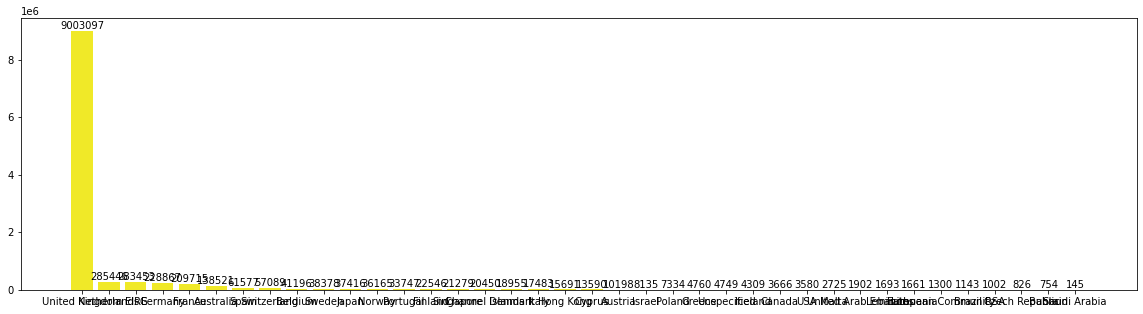

In [61]:
import matplotlib.pyplot as plt
 
Country = df['Country'].tolist()
Price =  df['Price'].tolist()
colors = ['#F0E928']

plt.figure(figsize=(20, 5))

# Plot the bar graph
plot = plt.bar(Country, Price, color = colors)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
 
# Add labels and title
# plt.title("Price count of Day of Week ")
# plt.xlabel("Day of Week")
# plt.ylabel("Price count")
 
# Display the graph on the screen
plt.show()

In [66]:
df = data.groupby(by ='Country').sum().sort_values(by='Price', ascending=False).reset_index()
df = df[df['Country'] != 'United Kingdom']

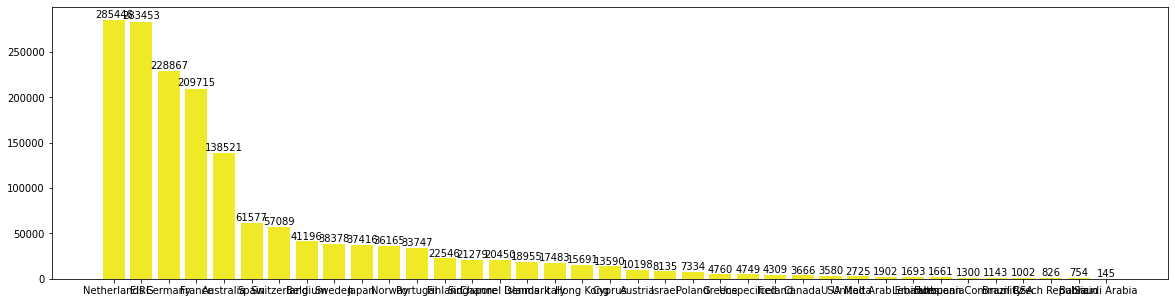

In [67]:
import matplotlib.pyplot as plt
 
Country = df['Country'].tolist()
Price =  df['Price'].tolist()
colors = ['#F0E928']

plt.figure(figsize=(20, 5))

# Plot the bar graph
plot = plt.bar(Country, Price, color = colors)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
plt.show()

## 4 หา assosiation rules ที่น่าสนใจ ของลูกค้ารายบุคคล /ลูกค่าเเต่ลำคนเค้ามักจะซื้ออะไรพร้อมกัน

In [69]:
#4 หา assosiation rules ที่น่าสนใจ ของลูกค้ารายบุคคล /ลูกค่าเเต่ลtคนเค้ามักจะซื้ออะไรพร้อมกัน
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34


In [96]:
transactions0 = data.groupby('CustomerID')['StockCode'].apply(list) # ไม่ต้อง .reset_index() 
transactions0

CustomerID
12346.0                                              [23166]
12347.0    [85116, 22375, 71477, 22492, 22771, 22772, 227...
12348.0    [84992, 22951, 84991, 84991, 21213, 21213, 226...
12349.0    [23112, 23460, 21564, 21411, 21563, 22131, 221...
12350.0    [21908, 22412, 79066K, 79191C, 22348, 84086C, ...
                                 ...                        
18280.0    [82484, 22180, 22467, 22725, 22727, 22495, 223...
18281.0    [22037, 22716, 22028, 23007, 23008, 23209, 22467]
18282.0    [21270, 23187, 23295, 22089, 21108, 21109, 224...
18283.0    [22356, 20726, 22384, 22386, 20717, 20718, 850...
18287.0    [22755, 22754, 22753, 22756, 22758, 22757, 227...
Name: StockCode, Length: 4339, dtype: object

In [141]:
from apyori import apriori
frequentitemsets0 = list(apriori(transactions0, min_support = 0.05)) #อยากได้ min_support อย่างน้อย 5%
list(frequentitemsets0[-1])#อยากได้ min_support อย่างน้อย 5% - > (ลูกค่าอย่างน้อย5%  )
#ซื้อ '22423', '22697', '22698', '22699 พร้อมกัน

### เลือกกฎที่มี confidence สูง จะได้ว่า
# 90% ทีลูกค้าที่ซื้อ '22698', '22699', '22423' จะซื้อ '22697'
#items_base=frozenset({'22698', '22699', '22423'}), items_add=frozenset({'22697'}), confidence=0.9613733905579399

[frozenset({'22423', '22697', '22698', '22699'}),
 0.05162479834063148,
 [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22698', '22699', '22423', '22697'}), confidence=0.05162479834063148, lift=1.0),
  OrderedStatistic(items_base=frozenset({'22423'}), items_add=frozenset({'22698', '22699', '22697'}), confidence=0.2542565266742338, lift=4.226892985591956),
  OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22698', '22699', '22423'}), confidence=0.5788113695090439, lift=10.778809151501036),
  OrderedStatistic(items_base=frozenset({'22698'}), items_add=frozenset({'22699', '22423', '22697'}), confidence=0.7021943573667712, lift=11.763788867237142),
  OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22698', '22423', '22697'}), confidence=0.5295508274231678, lift=9.378453225261735),
  OrderedStatistic(items_base=frozenset({'22423', '22697'}), items_add=frozenset({'22698', '22699'}), confidence=0.7542087542087542, lift=12.03129332

In [118]:
data[(data['StockCode'] =='22423') | (data['StockCode'] =='22697') | (data['StockCode'] =='22698') | (data['StockCode'] =='22699')].groupby(by =['Description','StockCode']).sum()

,,Quantity,UnitPrice,CustomerID,Price
Description,StockCode,,,,
GREEN REGENCY TEACUP AND SAUCER,22697,7304,3975.79,11017440.0,22826.30
PINK REGENCY TEACUP AND SAUCER,22698,5825,2921.67,8934127.0,17551.76
REGENCY CAKESTAND 3 TIER,22423,13890,28191.46,25806890.0,174484.74
ROSES REGENCY TEACUP AND SAUCER,22699,9878,3958.21,12189436.0,29095.27


## 3 วาดกราฟ จำนวนสมาชิกของแต่ละประเทศ


In [119]:
#3 วาดกราฟ จำนวนสมาชิกของแต่ละประเทศ
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom,20.34


In [161]:
df = data.groupby(by ='Country').count().reset_index()[['Country','InvoiceNo']].sort_values(by = 'InvoiceNo', ascending=False)[['Country','InvoiceNo']]
df 

,Country,InvoiceNo
36,United Kingdom,486286
14,Germany,9042
13,France,8408
10,EIRE,7894
31,Spain,2485
24,Netherlands,2363
3,Belgium,2031
33,Switzerland,1967
27,Portugal,1501
0,Australia,1185


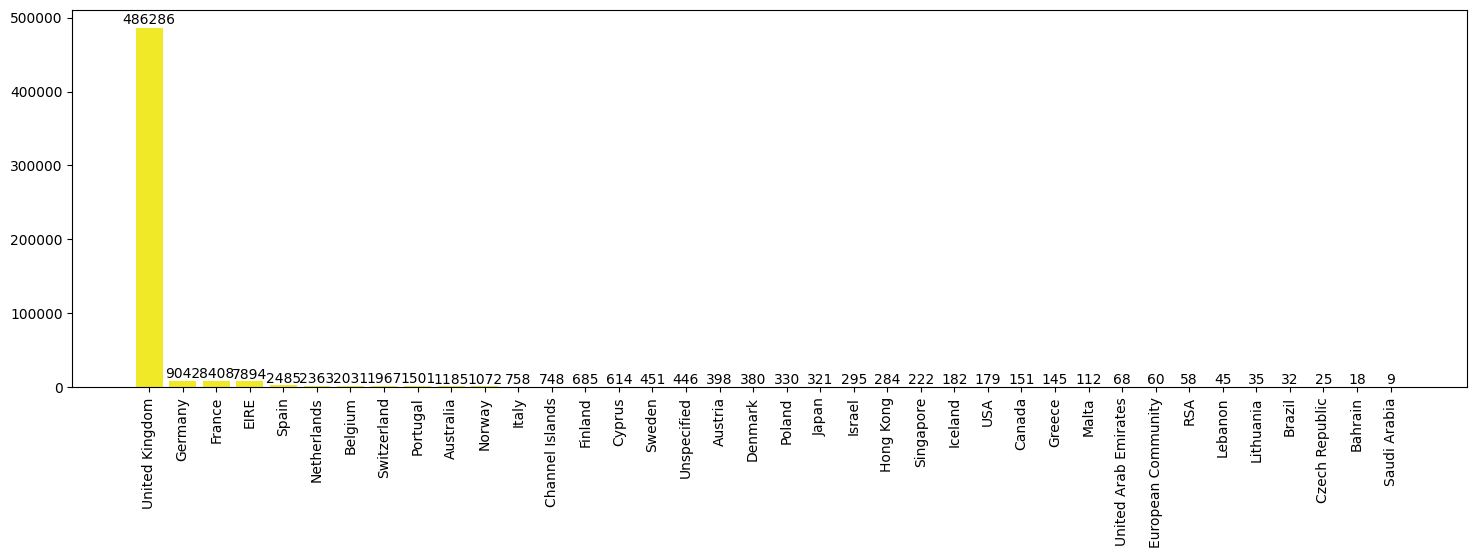

In [162]:
import matplotlib.pyplot as plt
 
Country = df['Country'].tolist()
count =  df['InvoiceNo'].tolist()
colors = ['#F0E928']

# plt.figure(figsize=(20, 5))
fig, ax = plt.subplots(figsize=(18, 5), dpi=100)

# Plot the bar graph
plt.bar(Country, count, color = colors)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
ax.set_xticklabels(Country, rotation=90)
plt.show()

### ตัด ประเทศ United Kingdom ออก

In [176]:
# df = df.iloc[1:,:]
df = data[data['Country'] != 'United Kingdom']
df = df.groupby(by ='Country').count().reset_index()[['Country','InvoiceNo']].sort_values(by = 'InvoiceNo', ascending=False)[['Country','InvoiceNo']]
# df = df[df['Country'] != 'United Kingdom']

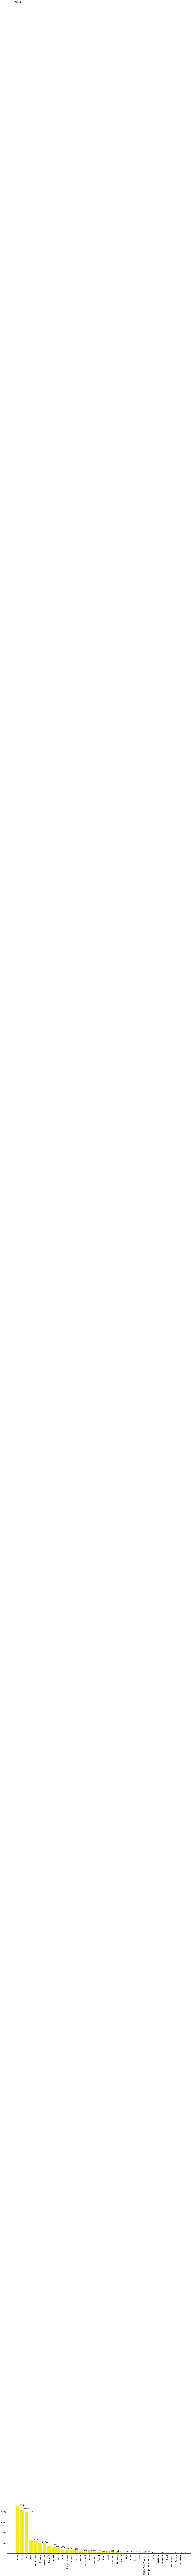

In [177]:
import matplotlib.pyplot as plt
 
Country = df['Country'].tolist()
count =  df['InvoiceNo'].tolist()
colors = ['#F0E928']

# plt.figure(figsize=(20, 5))
fig, ax = plt.subplots(figsize=(18, 5), dpi=100)

# Plot the bar graph
plt.bar(Country, count, color = colors)
 
# Add the data value on head of the bar
for value in plot:
    height = value.get_height()
    plt.text(value.get_x() + value.get_width()/2.,
             1.002*height,'%d' % int(height), ha='center', va='bottom')
ax.set_xticklabels(Country, rotation=90)
plt.show()

# ทำ Assosiation Rules

In [7]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=acc551ed0b8681dacaef743fbe8a27b538d068892489445d09fd4969148455d0
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [8]:
from apyori import apriori

In [14]:
frequentitemsets = list(apriori(transactions, min_support = 0.03)) #อยากได้ min_support อย่างน้อย 0.075
frequentitemsets

[RelationRecord(items=frozenset({'20712'}), support=0.033667953667953665, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20712'}), confidence=0.033667953667953665, lift=1.0)]),
 RelationRecord(items=frozenset({'20719'}), support=0.03254826254826255, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20719'}), confidence=0.03254826254826255, lift=1.0)]),
 RelationRecord(items=frozenset({'20724'}), support=0.04054054054054054, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20724'}), confidence=0.04054054054054054, lift=1.0)]),
 RelationRecord(items=frozenset({'20725'}), support=0.062084942084942085, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.062084942084942085, lift=1.0)]),
 RelationRecord(items=frozenset({'20726'}), support=0.04003861003861004, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozense

In [20]:
frequentitemsets = list(apriori(transactions, min_support = 0.03)) #อยากได้ min_support อย่างน้อย 0.03
list(frequentitemsets[-1]) #ตัวเหนี่ยวนำไม่มี 
#ซื้อ 22697 -> ซื้อ 22699
#ซื้อ 22699 -> ซื้อ 22697

[frozenset({'22697', '22699'}),
 0.03027027027027027,
 [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22699', '22697'}), confidence=0.03027027027027027, lift=1.0),
  OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22699'}), confidence=0.7417218543046358, lift=17.1523178807947),
  OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22697'}), confidence=0.7, lift=17.1523178807947)]]

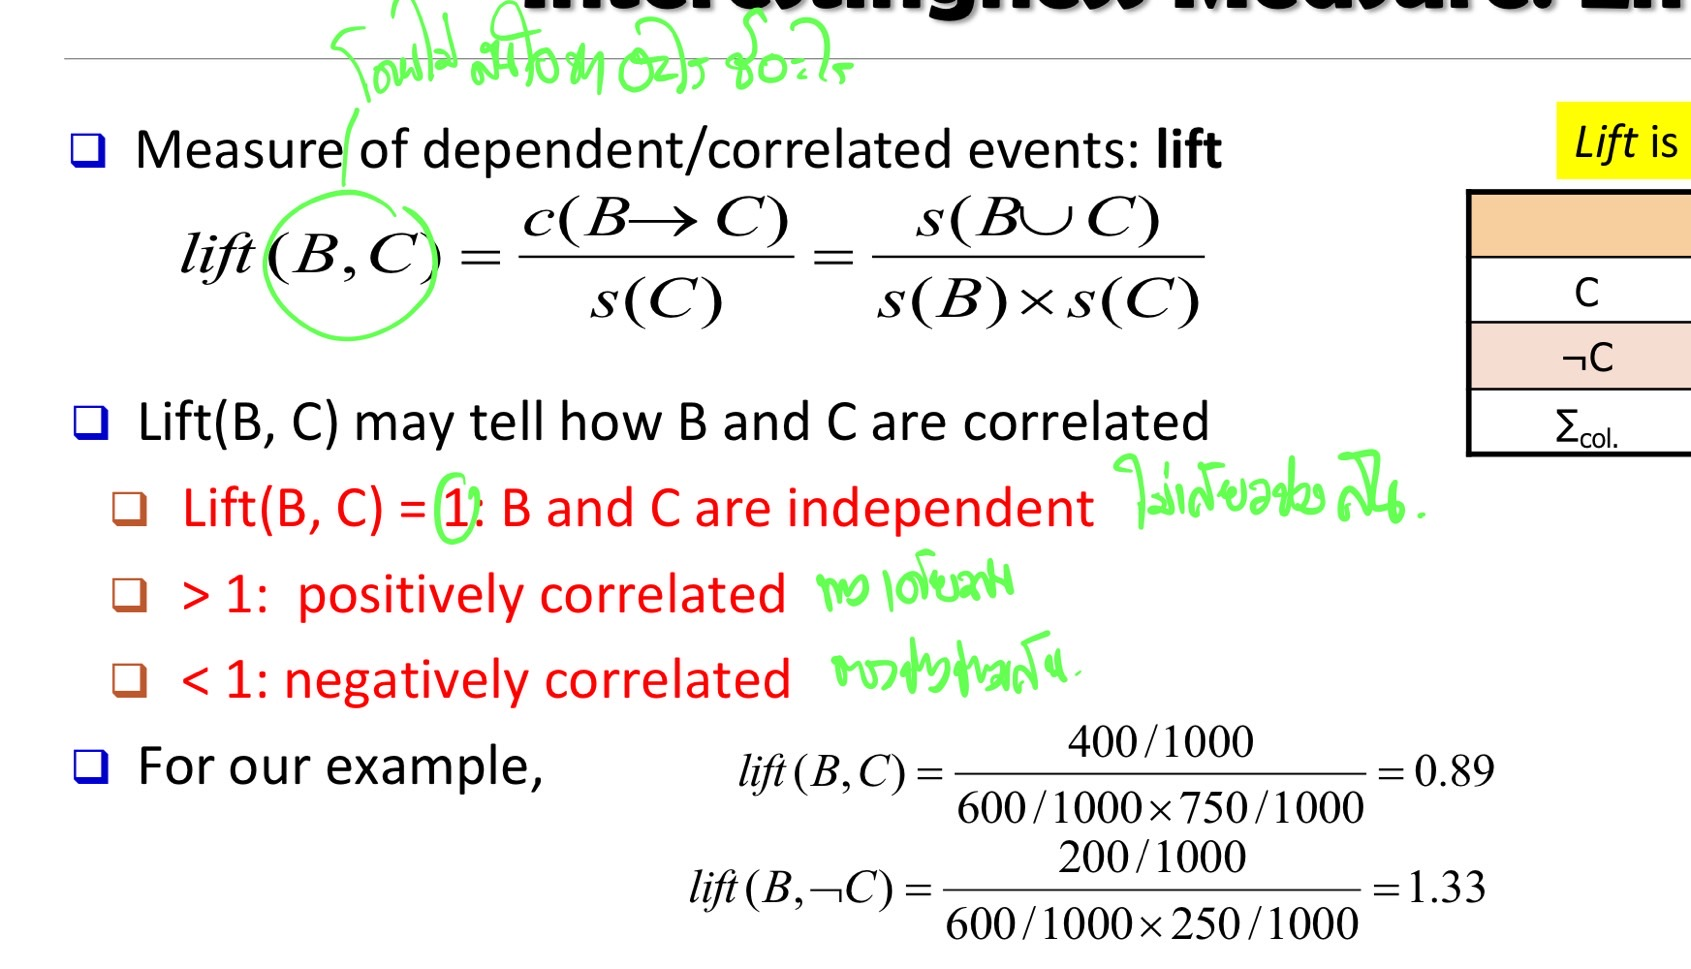

In [19]:
frequentitemsets = list(apriori(transactions, min_support = 0.02)) #อยากได้ min_support อย่างน้อย 0.02
list(frequentitemsets[-1])
#ซื้อ '22698', '22699', '22697' พร้อมกัน
# 22697 เหนี่ยวนำ '22698', '22699'

[frozenset({'22697', '22698', '22699'}),
 0.021196911196911198,
 [OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22698', '22699', '22697'}), confidence=0.021196911196911198, lift=1.0),
  OrderedStatistic(items_base=frozenset({'22697'}), items_add=frozenset({'22698', '22699'}), confidence=0.5193945127719962, lift=21.909312509437626),
  OrderedStatistic(items_base=frozenset({'22698'}), items_add=frozenset({'22699', '22697'}), confidence=0.6845386533665836, lift=22.614223370146064),
  OrderedStatistic(items_base=frozenset({'22699'}), items_add=frozenset({'22698', '22697'}), confidence=0.4901785714285714, lift=19.71370341614907),
  OrderedStatistic(items_base=frozenset({'22698', '22697'}), items_add=frozenset({'22699'}), confidence=0.8524844720496895, lift=19.71370341614907),
  OrderedStatistic(items_base=frozenset({'22699', '22697'}), items_add=frozenset({'22698'}), confidence=0.7002551020408164, lift=22.614223370146068),
  OrderedStatistic(items_base=frozenset({'22698', '